In [4]:
import torch
from utils.gaussian_diffusion import GaussianDiffusion
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./../data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./../data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

diffusion = GaussianDiffusion(img_size=(3, 32, 32), timesteps=1000, beta_start=0.0001, beta_end=0.02, device='cpu')

data_iter = iter(trainloader)
images, labels = next(data_iter)
images = images.to('cpu')

t = torch.randint(0, diffusion.timesteps, (images.size(0),), device='cpu').long()
x_t, noise = diffusion.forward_diffusion(images, t)

print(f"Input shape: {images.shape}")
print(f"Noisy shape: {x_t.shape}")

Input shape: torch.Size([32, 3, 32, 32])
Noisy shape: torch.Size([32, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8242979..1.9150534].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.80943465..1.6651143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.595688..2.101195].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.56213474..1.6662185].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.79259324..1.4878378].


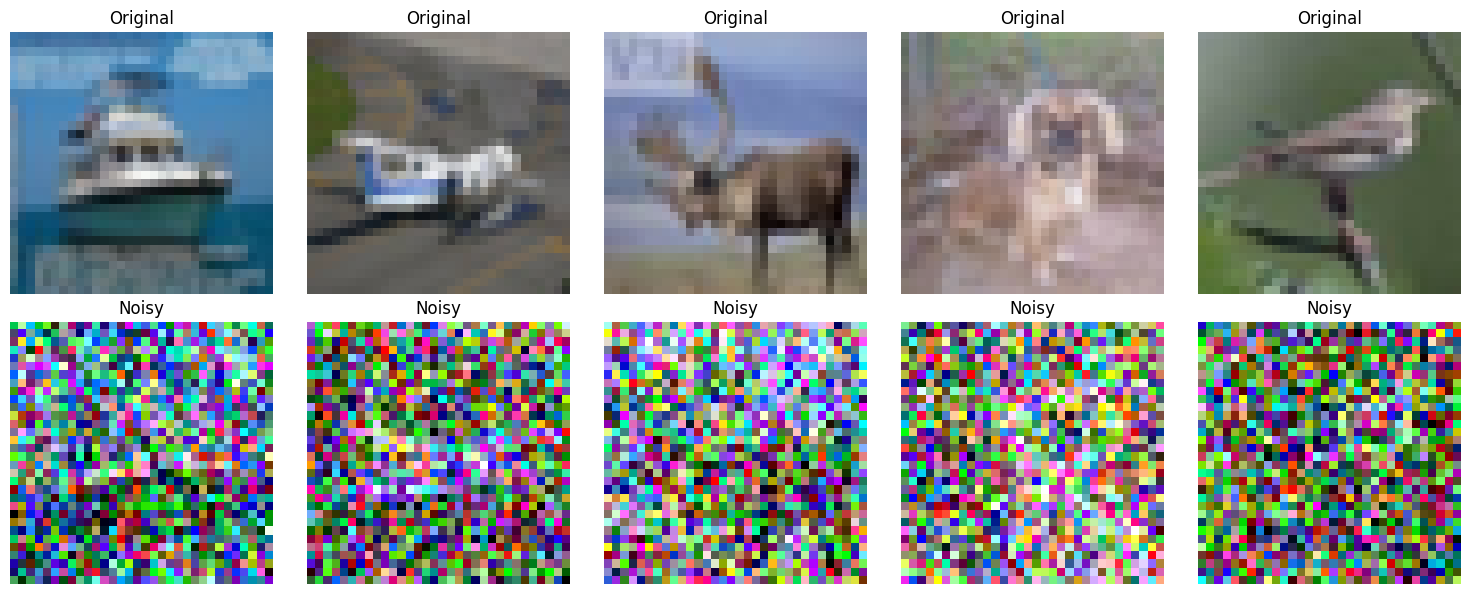

In [15]:
from utils.visualization import visualize_noisy_samples

data_iter = iter(trainloader)
images, labels = next(data_iter)
images = images.to('cpu')

t = 250
noisy_images, noise = diffusion.forward_diffusion(images, t)

visualize_noisy_samples(images, noisy_images, num_samples=5)

In [16]:
from scipy.stats import entropy
import numpy as np

def assess_randomness(image):
    """
    Measure the randomness of an image by calculating entropy and standard deviation.
    
    Args:
        image (torch.Tensor): A single image tensor of shape (C, H, W).
    
    Returns:
        randomness_value (float): A score representing the randomness of the image.
    """
    image = image.cpu().numpy()

    randomness_scores = []
    
    for channel in range(image.shape[0]):
        channel_data = image[channel].flatten()
        
        # Normalize the data to be between 0 and 1
        channel_data = (channel_data - channel_data.min()) / (channel_data.max() - channel_data.min())
        
        # Compute histogram for pixel intensities (with 256 bins)
        hist, bin_edges = np.histogram(channel_data, bins=256, range=(0, 1), density=True)
        
        # Calculate entropy of the histogram
        channel_entropy = entropy(hist + 1e-10)
        
        # Calculate standard deviation of the pixel intensities
        channel_std = np.std(channel_data)
        
        # add entropy and standard deviation to form a randomness score
        randomness_score = channel_entropy + channel_std
        randomness_scores.append(randomness_score)

    randomness_value = np.mean(randomness_scores)
    
    return randomness_value


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3983525..1.3409836].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3722477..1.2892767].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3698256..1.3581038].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21786702..1.3001881].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22252989..1.1256344].


Original Image 0 Randomness: 4.6839
Noisy Image 0 Randomness: 5.2134
Original Image 1 Randomness: 2.4801
Noisy Image 1 Randomness: 4.8935
Original Image 2 Randomness: 5.4950
Noisy Image 2 Randomness: 5.3226
Original Image 3 Randomness: 5.0475
Noisy Image 3 Randomness: 5.1450
Original Image 4 Randomness: 4.6820
Noisy Image 4 Randomness: 5.1218
Original Image 5 Randomness: 4.8929
Noisy Image 5 Randomness: 5.1869
Original Image 6 Randomness: 4.8739
Noisy Image 6 Randomness: 5.1819
Original Image 7 Randomness: 4.1606
Noisy Image 7 Randomness: 4.9286
Original Image 8 Randomness: 4.9084
Noisy Image 8 Randomness: 5.1673
Original Image 9 Randomness: 5.3283
Noisy Image 9 Randomness: 5.3319
Original Image 10 Randomness: 5.1506
Noisy Image 10 Randomness: 5.3343
Original Image 11 Randomness: 5.2034
Noisy Image 11 Randomness: 5.1800
Original Image 12 Randomness: 5.4030
Noisy Image 12 Randomness: 5.3987
Original Image 13 Randomness: 5.5388
Noisy Image 13 Randomness: 5.2536
Original Image 14 Randomne

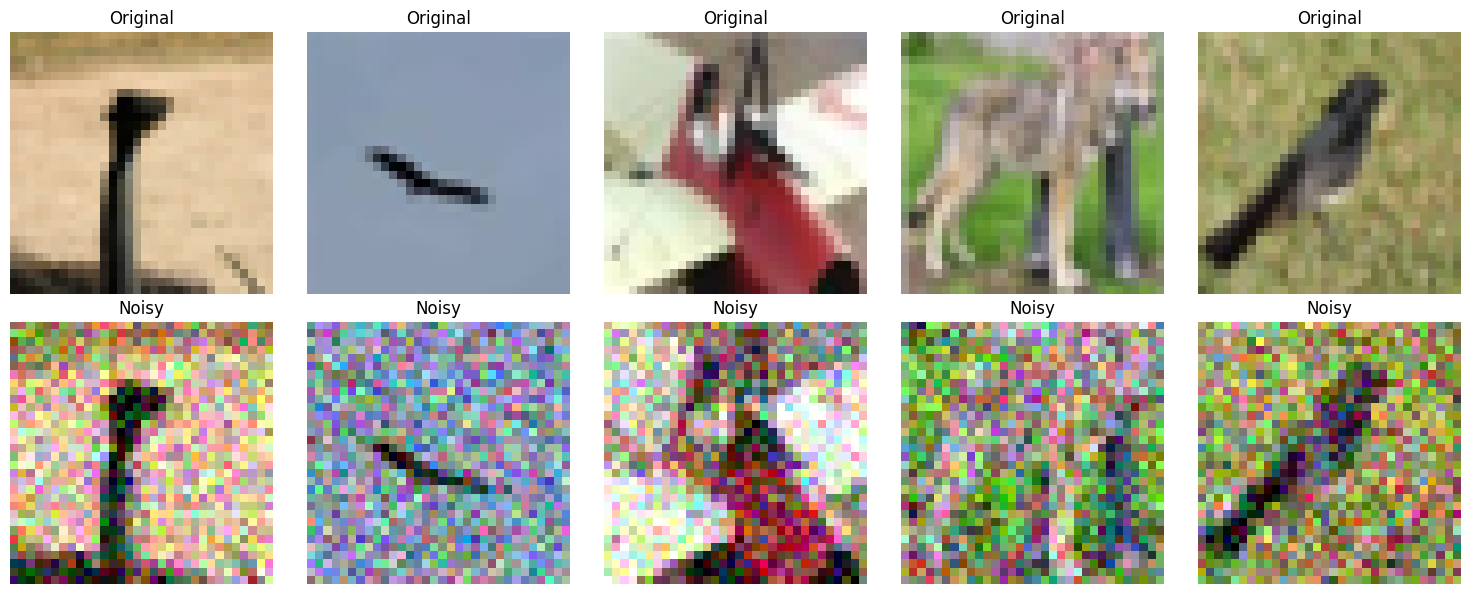

In [25]:
# Example: Get a batch of images from CIFAR-10
data_iter = iter(trainloader)
images, labels = next(data_iter)
images = images.to('cpu')

# Forward diffusion example (add noise to images)
t=100
noisy_images, _ = diffusion.forward_diffusion(images, t)

# Calculate randomness for original and noisy images
randomness_scores_original = [assess_randomness(images[i]) for i in range(images.size(0))]
randomness_scores_noisy = [assess_randomness(noisy_images[i]) for i in range(noisy_images.size(0))]

# Print randomness values (or log them)
for i in range(len(randomness_scores_original)):
    print(f"Original Image {i} Randomness: {randomness_scores_original[i]:.4f}")
    print(f"Noisy Image {i} Randomness: {randomness_scores_noisy[i]:.4f}")

# Visualize original and noisy images
visualize_noisy_samples(images, noisy_images, num_samples=5)


In [27]:
from scipy.stats import entropy
import matplotlib.pyplot as plt

def calculate_local_entropy(image, patch_size=8):
    """
    Calculate local entropy for non-overlapping patches of an image.
    
    Args:
        image (torch.Tensor): A single image tensor of shape (C, H, W).
        patch_size (int): Size of the square patches to extract.
    
    Returns:
        entropy_map (np.ndarray): A 2D array containing entropy values for each patch.
    """
    # Convert the image to a numpy array
    image = image.cpu().numpy()
    
    # Get the dimensions of the image
    C, H, W = image.shape
    
    # Calculate the number of patches in both dimensions
    num_patches_x = H // patch_size
    num_patches_y = W // patch_size
    
    entropy_map = np.zeros((num_patches_x, num_patches_y))

    # Iterate over the patches
    for i in range(num_patches_x):
        for j in range(num_patches_y):
            # Extract the patch from the image
            patch = image[:, i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size]
            
            # Flatten the patch and normalize its values
            patch_data = patch.flatten()
            patch_data = (patch_data - patch_data.min()) / (patch_data.max() - patch_data.min())
            
            # Compute histogram for pixel intensities (256 bins)
            hist, _ = np.histogram(patch_data, bins=256, range=(0, 1), density=True)
            
            # Calculate Shannon entropy for the patch
            patch_entropy = entropy(hist + 1e-10)  # Add a small constant to avoid log(0)
            
            # Store the entropy value in the map
            entropy_map[i, j] = patch_entropy
    
    return entropy_map

def visualize_image_with_patch_entropy(image, entropy_map, patch_size=8):
    """
    Visualize the image with entropy scores for each patch.
    
    Args:
        image (torch.Tensor): The original image tensor.
        entropy_map (np.ndarray): A 2D array of entropy values for each patch.
        patch_size (int): Size of the patches.
    """
    # Convert the image to numpy and denormalize
    image = image.cpu().numpy()
    image = (image * 0.5) + 0.5  # Undo normalization
    image = np.transpose(image, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)

    num_patches_x, num_patches_y = entropy_map.shape

    # Display the image with entropy values for each patch
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)
    
    # Add entropy values as text over each patch
    for i in range(num_patches_x):
        for j in range(num_patches_y):
            y_pos = (i * patch_size) + patch_size // 2
            x_pos = (j * patch_size) + patch_size // 2
            ax.text(x_pos, y_pos, f"{entropy_map[i, j]:.2f}", color='red', 
                    ha='center', va='center', fontsize=10, fontweight='bold', 
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    
    plt.axis('off')
    plt.show()

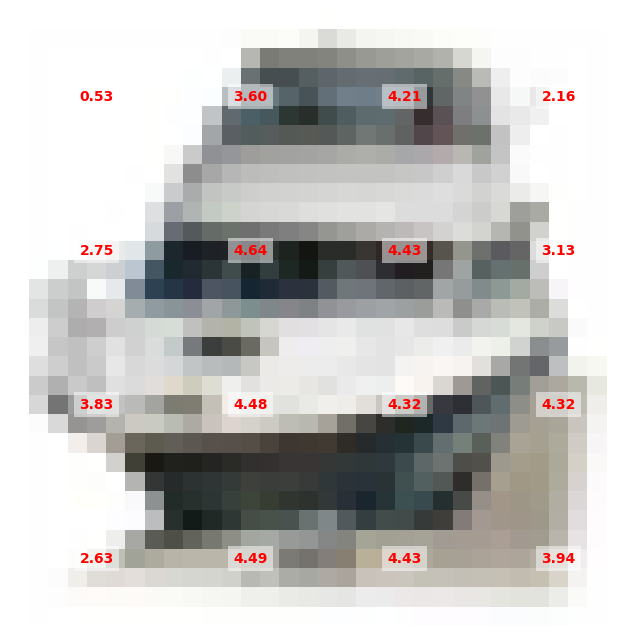

In [35]:
# Example: Get a batch of images from CIFAR-10
data_iter = iter(trainloader)
images, labels = next(data_iter)
images = images.to('cpu')

# Take the first image from the batch
single_image = images[0]

# Calculate the local entropy on patches of size 8x8
patch_size = 8
entropy_map = calculate_local_entropy(single_image, patch_size=patch_size)

# Visualize the image with entropy scores on each patch
visualize_image_with_patch_entropy(single_image, entropy_map, patch_size=patch_size)


In [62]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import math

def apply_noise_based_on_randomness(image, diffusion, randomness_map, patch_size=8, max_timesteps=1000):
    """
    Apply Gaussian noise to each patch based on the calculated randomness factor for each patch.

    Args:
        image (torch.Tensor): The input image of shape (C, H, W).
        diffusion (object): The Gaussian diffusion model object.
        randomness_map (np.ndarray): A 2D array of randomness values for each patch.
        patch_size (int): Size of the patches.
        max_timesteps (int): Maximum number of timesteps for diffusion process.

    Returns:
        noisy_image (torch.Tensor): The image with Gaussian noise applied to each patch.
    """
    noisy_image = image.clone()

    num_patches_x, num_patches_y = randomness_map.shape

    min_randomness = randomness_map.min()
    max_randomness = randomness_map.max()
    if max_randomness - min_randomness == 0:
        normalized_randomness = 1
    else:
        normalized_randomness = (randomness_map - min_randomness) / (max_randomness - min_randomness)

    for i in range(num_patches_x):
        for j in range(num_patches_y):
            patch = image[:, i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size]

            # timesteps = int((1 - normalized_randomness[i, j]) * max_timesteps)
            timesteps = int(499/math.exp(normalized_randomness[i, j]))
            print(f"For ra {normalized_randomness[i, j]} noising with {timesteps} timesteps")

            t = torch.tensor([timesteps], device=image.device)
            noisy_patch, _ = diffusion.forward_diffusion(patch.unsqueeze(0), t)

            noisy_image[:, i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = noisy_patch.squeeze(0)

    return noisy_image

def visualize_image_with_patches(image, patch_size=8, show_borders=True):
    """
    Visualize the image with an option to display patch borders.

    Args:
        image (torch.Tensor): The input image tensor.
        patch_size (int): Size of the patches.
        show_borders (bool): Whether to show the patch borders or not.
    """
    image = image.cpu().numpy()
    image = (image * 0.5) + 0.5  # Undo normalization
    image = np.transpose(image, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)

    if show_borders:
        H, W, _ = image.shape
        num_patches_x = H // patch_size
        num_patches_y = W // patch_size

        for i in range(1, num_patches_x):
            ax.axhline(i * patch_size, color='white', linestyle='--', linewidth=1)
        for j in range(1, num_patches_y):
            ax.axvline(j * patch_size, color='white', linestyle='--', linewidth=1)

    plt.axis('off')
    plt.show()


For ra 0.0 noising with 499 timesteps
For ra 0.40364006700848687 noising with 333 timesteps
For ra 0.33808963635292943 noising with 355 timesteps
For ra 0.36633258469807706 noising with 345 timesteps
For ra 0.42045884636520386 noising with 327 timesteps
For ra 0.700289301290062 noising with 247 timesteps
For ra 0.37073525602248336 noising with 344 timesteps
For ra 0.24651821410207678 noising with 389 timesteps
For ra 0.623302259484681 noising with 267 timesteps
For ra 1.0 noising with 183 timesteps
For ra 0.8391413909768687 noising with 215 timesteps
For ra 0.5609805263690796 noising with 284 timesteps
For ra 0.4942171906096722 noising with 304 timesteps
For ra 0.9462619374514982 noising with 193 timesteps
For ra 0.9230129582264497 noising with 198 timesteps
For ra 0.7980404025106795 noising with 224 timesteps


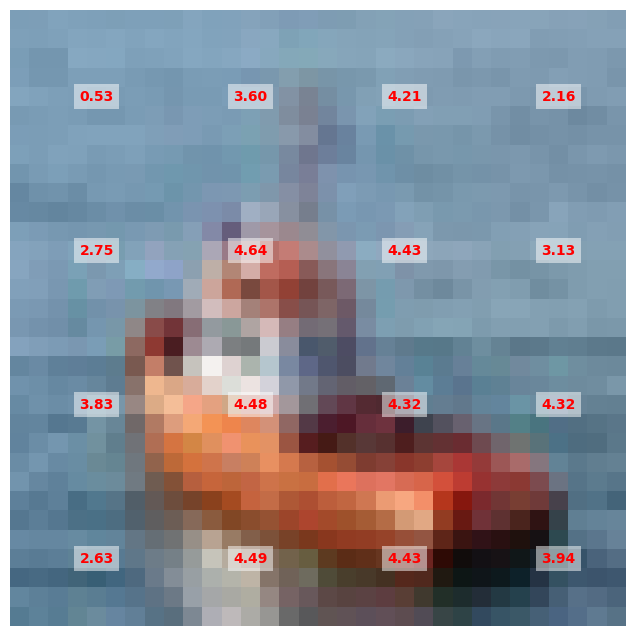

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8477074..2.2026567].


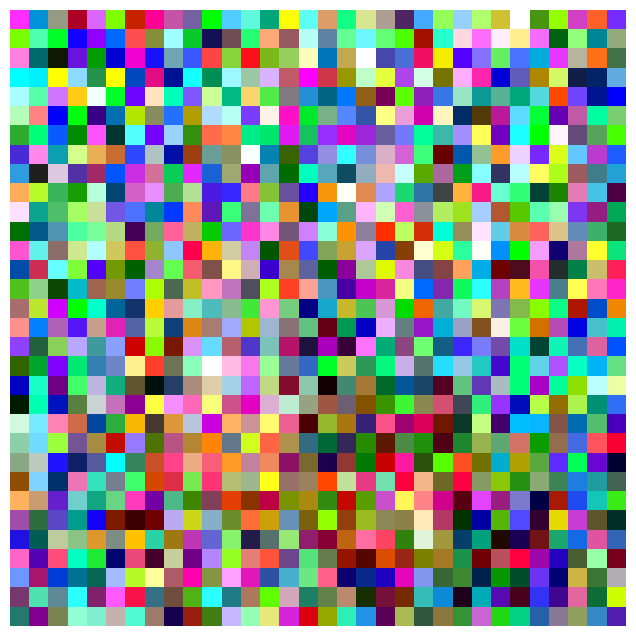

In [64]:
data_iter = iter(trainloader)
images, labels = next(data_iter)
images = images.to('cpu')

single_image = images[0]

patch_size = 8
randomness_map = calculate_local_entropy(single_image, patch_size=patch_size)

max_timesteps = 500
noisy_image = apply_noise_based_on_randomness(single_image, diffusion, randomness_map, patch_size=patch_size, max_timesteps=max_timesteps)

visualize_image_with_patch_entropy(single_image, entropy_map, patch_size=patch_size)
visualize_image_with_patches(noisy_image, patch_size=patch_size, show_borders=False)  # Without borders

